<a href="https://colab.research.google.com/github/jjramcar/Data-Science-Projects/blob/main/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detection
Here we will train several models and evaluate how effectively they predict instances of fraud using data based on this dataset from Kaggle.

Each row in fraud_data.csv corresponds to a credit card transaction. Features include confidential variables V1 through V28 as well as Amount which is the amount of the transaction.

The target is stored in the class column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

In [2]:
def task_one():
    df = pd.read_csv(r'/content/fraud_data.csv')
    
    total = df['Class'].count()
    fr=df['Class'].value_counts()
       
    return fr[1]/total

task_one()

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'/content/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7681,-1.332095,0.828224,1.280394,-0.000192,0.006864,0.193420,0.065110,-0.694045,0.020374,0.275932,...,-0.361099,0.632575,-0.286266,0.283056,0.019710,-0.570700,0.409895,-0.669576,-0.374803,4.00
21329,1.900589,-0.850905,-0.856684,0.419809,-0.329338,0.512227,-0.644830,0.083636,-0.622460,1.100660,...,-0.393216,-0.234496,-0.263067,0.151624,0.170524,-0.142015,-0.703641,0.049886,-0.021393,96.00
14695,2.242056,-1.496697,-1.006464,-1.448708,-1.440162,-1.035270,-1.011986,-0.251838,-1.060550,1.598898,...,-0.443243,-0.170011,-0.090092,0.194057,-0.155795,-0.199022,-0.153737,-0.005144,-0.049103,50.00
12338,-0.308109,1.107050,-0.184132,-0.528948,1.000317,-0.517253,0.935125,0.012976,-0.150110,-1.081891,...,0.055325,0.044064,0.465492,-0.370183,-0.561096,-0.152336,0.590986,0.376048,0.248322,3.79
17768,-1.405410,1.985541,-1.290536,-1.672087,1.133642,-1.327069,1.839333,-0.605819,1.243372,2.321808,...,0.881069,-0.058432,0.731687,-0.273287,-0.427056,-0.032592,0.073411,0.779993,0.247911,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,2.108057,-0.068298,-1.637994,-0.075459,0.785052,0.170575,0.063027,-0.075121,0.202474,0.209343,...,-0.090014,-0.304134,-0.765574,0.220031,-0.326253,-0.134034,0.208094,-0.074702,-0.072162,0.89
19648,-1.139866,1.130677,0.573881,1.034586,0.177193,-0.011452,-0.018946,0.679649,-0.231098,-0.634133,...,-0.016407,-0.218900,-0.610938,-0.233344,-0.490935,-0.117678,-0.453945,0.206407,0.069866,19.90
9845,1.795059,-0.456973,-2.049603,0.241425,0.347659,-0.217058,0.000488,0.053710,0.971166,-0.695139,...,0.006272,-0.172207,-0.612954,0.077735,0.073546,-0.115195,-0.116337,-0.042548,-0.012938,121.36
10799,1.185560,-0.062333,0.173661,-0.532931,-0.681227,-0.949888,-0.267220,-0.034664,1.528210,-1.577029,...,-0.134965,-0.018312,0.231974,-0.053601,0.319664,0.556433,-0.615846,0.102273,0.053048,7.00


In [4]:
def task_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    from sklearn.metrics import accuracy_score
    
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    
    y_dummy_predictions = dummy_majority.predict(X_test)
    
    return (accuracy_score(y_test, y_dummy_predictions),recall_score(y_test, y_dummy_predictions))

task_two()

(0.9852507374631269, 0.0)

##Task 3
Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

This function should a return a tuple with three floats, i.e. (accuracy score, recall score, precision score).

In [5]:
def task_three():
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    from sklearn.svm import SVC

    svm = SVC().fit(X_train, y_train)
    svm_predicted = svm.predict(X_test) 
       
    return (accuracy_score(y_test, svm_predicted), recall_score(y_test, svm_predicted), precision_score(y_test,svm_predicted))

task_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

##Task 4
Using the SVC classifier with parameters {'C': 1e9, 'gamma': 1e-07}, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

This function should return a confusion matrix, a 2x2 numpy array with 4 integers.

In [8]:
def task_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svm = SVC(C=1e9, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovo', degree=3, gamma=1e-07, kernel='rbf',
              max_iter=-1, probability=False, random_state=None, shrinking=True,
              tol=0.001, verbose=False).fit(X_test, y_test)
    y_scores_svm = svm.decision_function(X_test)
    
    y_scores_svm = np.where(y_scores_svm > -220, 1, 0)
    confusion= confusion_matrix(y_test, y_scores_svm)
    
    return print(confusion)

task_four()

[[5170  174]
 [   7   73]]


##Task 5
Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is 0.75?

Looking at the roc curve, what is the true positive rate when the false positive rate is 0.16?

This function should return a tuple with two floats, i.e. (recall, true positive rate).

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


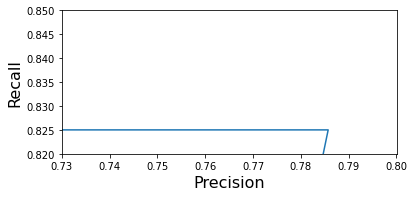

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


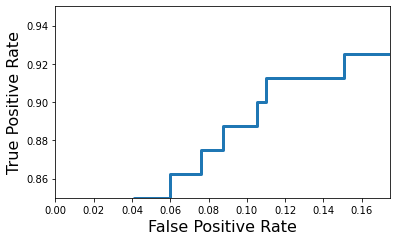

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
    
    
lr = LogisticRegression().fit(X_train, y_train) 
y_scores_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test) 
y_proba_lr = y_proba_lr[0:5424,1]
    #y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))
    
    

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
plt.figure()
plt.xlim([0.73, 0.8])
plt.ylim([0.82, 0.85])
plt.plot(precision, recall, label='Precision-Recall Curve')
#plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show() 
    
from sklearn.metrics import roc_curve, auc


fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([0.0, 0.175])
plt.ylim([0.85, 0.95])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
    #plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    #plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
#plt.show()